In [1]:
import sys
import cv2
import os
sys.path.append("./../../../../src/")
from opendr.engine.data import Image
from opendr.simulation.human_model_generation.pifu_generator_learner import PIFuGeneratorLearner
import matplotlib.pyplot as plt
import numpy as np
current_dir = os.getcwd()

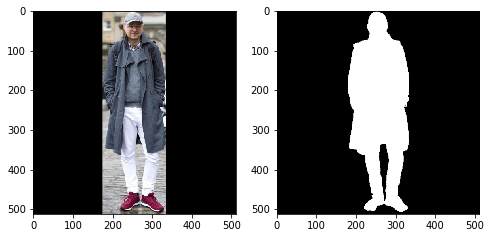

In [2]:
# Load input image and mask
rgb_img = Image(cv2.imread(os.path.join(current_dir,'imgs_input/rgb/result_0004.jpg')))
msk_img = Image(cv2.imread(os.path.join(current_dir,'imgs_input/msk/result_0004.jpg')))
%matplotlib inline
f, axarr = plt.subplots(1,2,figsize=(8,8))
axarr[0].imshow(rgb_img.numpy()[:,:,::-1])
axarr[1].imshow(msk_img.numpy()[:,:,::-1])

In [3]:
# Initialize PIFu and infer 
model_generator = PIFuGeneratorLearner(device='cuda', checkpoint_dir='./temp')
[model_3D, human_pose_3D] = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img], extract_pose=True)
#model_3D = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img])

PIFu model is loaded.
Downloaded metadata json.
Pretrained model download complete.


In [4]:
# Get renderings of the 3D model in various views (rotations)
rotations = [0, 45, 90, 180]
[out_imgs, human_pose_2D] = model_generator.get_img_views(model_3D = model_3D, rotations = rotations, human_pose_3D = human_pose_3D, plot_kps=False)
#out_imgs = model_generator.get_imgs_views(model_3D = model_3D, rotations = rotations)

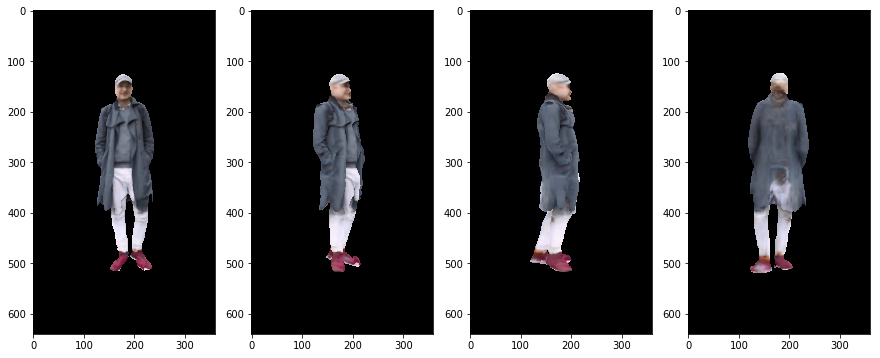

In [13]:
# Visualize views and 2D joints
f, axarr = plt.subplots(1, 4, figsize=(15,15))
axarr[0].imshow(out_imgs[0].numpy()[:,:,::-1])
axarr[1].imshow(out_imgs[1].numpy()[:,:,::-1])
axarr[2].imshow(out_imgs[2].numpy()[:,:,::-1])
axarr[3].imshow(out_imgs[3].numpy()[:,:,::-1])